In [1]:
%matplotlib inline

In [215]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import xgboost

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df1 = pd.read_csv('data/survey_results_schema.csv')

In [6]:
df2 = pd.read_csv('data/survey_results_public.csv') #Check warning

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


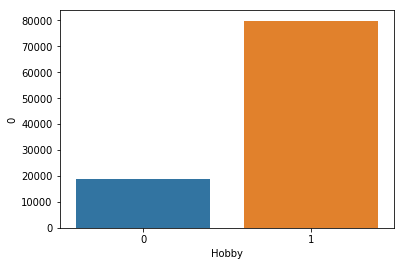

In [151]:
#Hobby Coders
plt.figure(1)
for_plot = df2.groupby(["Hobby"]).size()
for_plot = for_plot.reset_index()
sns.barplot(x = for_plot["Hobby"] , y = for_plot[0])
plt.show()

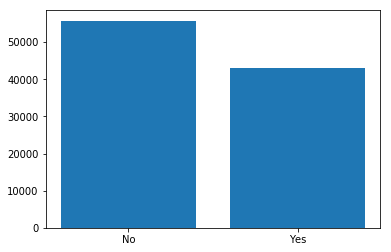

In [153]:
#Open Sourcers
plt.figure(1)
for_plot = df2.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])
plt.show()

In [157]:
df2["Hobby"].head()

0    1
1    1
2    1
3    0
4    1
Name: Hobby, dtype: int64

<Container object of 2 artists>

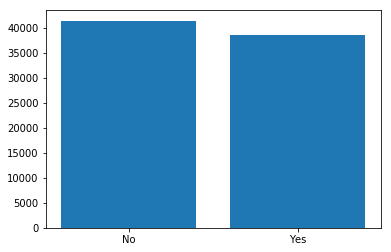

In [163]:
#Of the hobbyisits how many open sourcers and how many not?? ... Hmm not much of difference
plt.figure(1)
for_plot = df2[df2['Hobby'] == 1]
for_plot = for_plot.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])

In [14]:
#Lets filter out people who have Stackoverflow in their learning sources
#stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
df2["is_stack_learner"] = df2["SelfTaughtTypes"].str.contains("Stack Overflow")

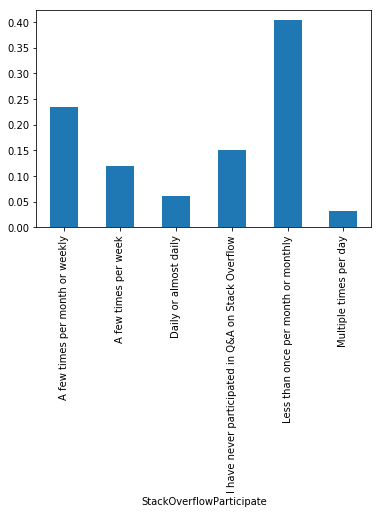

In [164]:
#40% use less than once per month, 25% weekly few times, 15% Never participated
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)

#So about 55% of users who use stack overflow for learning end up participating very rarely. This subset must be 
#done with further investigation

In [165]:
#Muslim Countries???
yo_muslim = pd.read_csv("data/yo_muslim.csv")

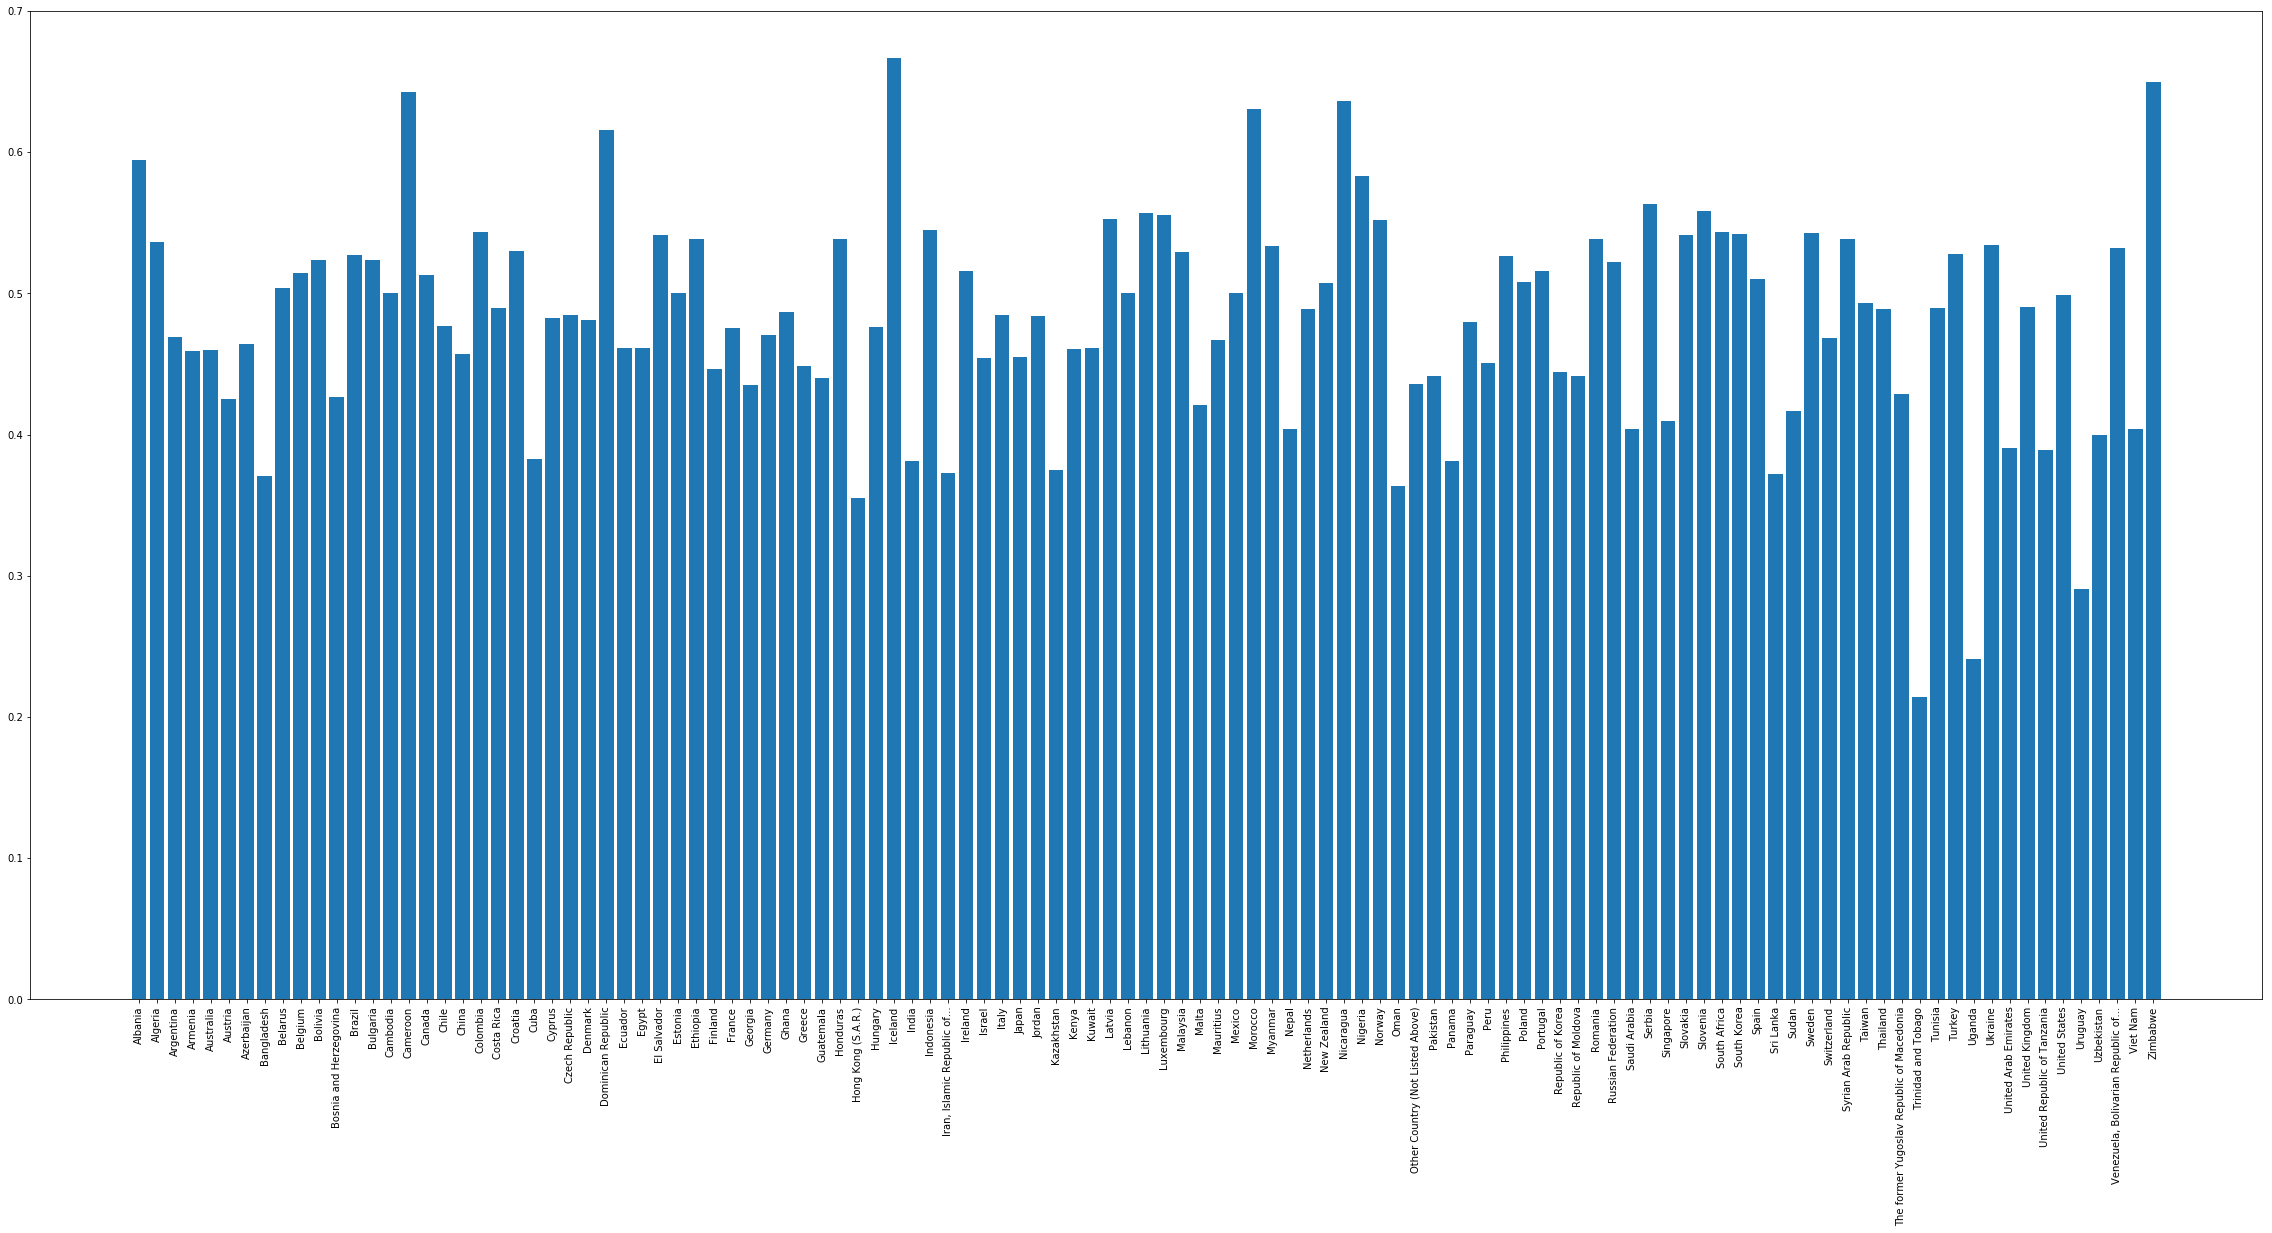

In [166]:
#Lets see the where the learners who dont participate are majorly from keep countries with stack learners > 10??
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot2 = for_plot.groupby(["Country"]).size().reset_index()
for_plot2 = for_plot2[for_plot2[0] > 10]
for_plot2.head()
for_plot = for_plot[for_plot.Country.isin(for_plot2.Country)]
for_plot['is_islamic'] = for_plot.Country.isin(yo_muslim["Name"])
for_plot["Non_Participaters"] = (for_plot['StackOverflowParticipate'] == "I have never participated in Q&A on Stack Overflow") | (for_plot['StackOverflowParticipate'] == "Less than once per month or monthly")
for_plota = for_plot.groupby(["Country"])["Non_Participaters"].mean().reset_index()
plt.figure(1 , figsize = (40,40))
plt.subplot(2,1,1)
plt.bar(x = for_plota["Country"] , height = for_plota["Non_Participaters"])
plt.xticks(rotation = 90)
plt.show()

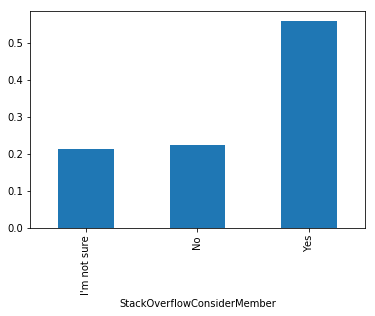

In [167]:
#How many learners consider themsevles to be the members of the Site
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowConsiderMember"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowConsiderMember", kind = "bar" , legend = False)

#Approx 40% of Stack learners dont cosider / not sure themselves as members... to be studied

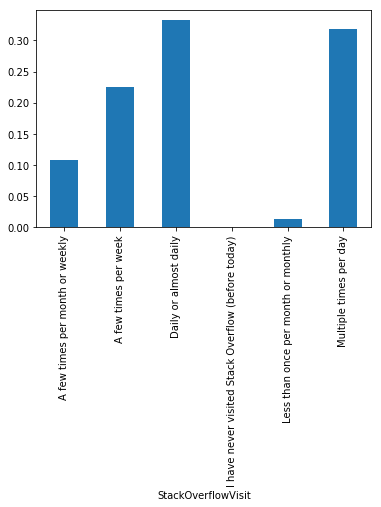

In [20]:
#Check the Visitors who are learners
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowVisit"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowVisit", kind = "bar" , legend = False)

#As expected if thats your learning resource you obviously would visit regularly.

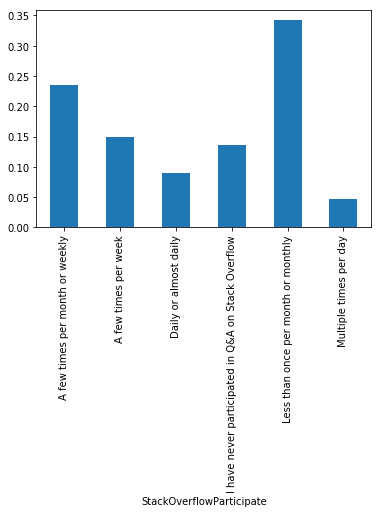

In [21]:
#Lets consider daily visitors and multiple time daily visitors what proportion of them participate
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot[(for_plot["StackOverflowVisit"] == "Daily or almost daily") | (for_plot["StackOverflowVisit"] == "Multiple times per day")]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)
#Daily visitors only 15% participate in proportion they visit. Whats wrong??

# Some real shit

In [22]:
code = {'Extremely interested':4 , 'Very interested' :3 , 'Somewhat interested' : 1 , 'A little bit interested' : 2 , 'Not at all interested' :0 }

In [23]:
tempo = df1[(df1["Column"].str.contains("StackOverflow")) | (df1["Column"].str.contains("Hypothetical"))].reset_index()

In [24]:
tempo.loc[9][2] #Negative 1

'Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A private area for people new to programming'

In [25]:
tempo.loc[0][2] #Postive 1

'How likely is it that you would recommend Stack Overflow overall to a friend or colleague? Where 0 is not likely at all and 10 is very likely.'

In [26]:
tempo.loc[2][2] #Positive 0.25

'Do you have a Stack Overflow account?'

In [27]:
tempo.loc[3][2] #Positive 2

'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [28]:
tempo.loc[7][2] #Positive 1.5

'Do you consider yourself a member of the Stack Overflow community?'

In [29]:
code  =  {'Extremely interested' :4 , 'Very interested' :3 , 'Somewhat interested' : 2 , 'A little bit interested' : 1 , 'Not at all interested' :0 }

In [30]:
code_reco = {'10 (Very Likely)' :4 , '7' :3 , '9' : 4 , '8' : 3,  '0' : 0 , '1' : 0 , '6' : 2 , '5' : 2 , '4' : 1.5, '3':1 , '2': 1 }

In [31]:
stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
stack_learners["is_stack_learner"] = stack_learners["SelfTaughtTypes"].str.contains("Stack Overflow")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
#Lets do for stack learners first
#stack_learners_only = stack_learners[stack_learners["is_stack_learner"]]
df2["Ease of Participation"] = -1 * stack_learners["HypotheticalTools2"].map(code)

In [33]:
cutting = df2["StackOverflowRecommend"].map(code_reco)

In [34]:
df2["Ease of Participation"] += cutting

In [35]:
accounter = df2["StackOverflowHasAccount"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure / I can\'t remember' : 0}) *4 * 0.25

In [36]:
df2["Ease of Participation"] += accounter

In [37]:
participate_map = {'I have never participated in Q&A on Stack Overflow':0, 'Less than once per month or monthly' :1 , 'A few times per month or weekly' : 2 ,'A few times per week' : 3 ,'Daily or almost daily' : 4, 'Multiple times per day' : 4  }

In [38]:
participate_map

{'A few times per month or weekly': 2,
 'A few times per week': 3,
 'Daily or almost daily': 4,
 'I have never participated in Q&A on Stack Overflow': 0,
 'Less than once per month or monthly': 1,
 'Multiple times per day': 4}

In [39]:
participates = df2["StackOverflowParticipate"].map(participate_map)

In [40]:
pd.unique(participates)

array([ 0.,  2., nan,  1.,  4.,  3.])

In [41]:
df2["Ease of Participation"] += (participates * 2)

In [42]:
memberso = df2["StackOverflowConsiderMember"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure' : 0}) * 4 * 1.5

In [43]:
df2["Ease of Participation"] += memberso

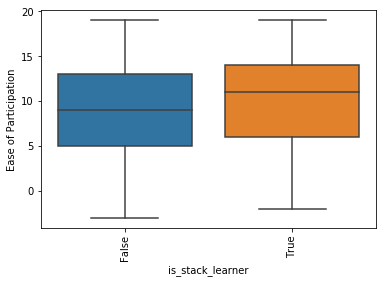

In [44]:
plt.figure(1)
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
sns.boxplot(x = for_plot["is_stack_learner"] , y = for_plot["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()
#sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
#sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

In [45]:
df2['is_islamic'] = df2.Country.isin(yo_muslim["Name"])

In [46]:
#Shifting to get log scale ---- for getting concentrated peak.
temp = np.log(df2["Ease of Participation"] + 5)

In [47]:
df2["log_scale_participation_score"] = temp

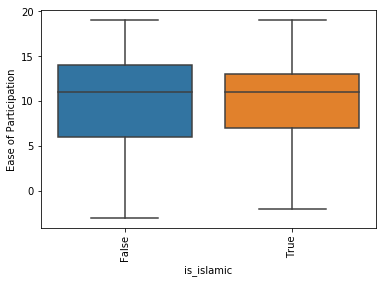

In [48]:
plt.figure(1)
sns.boxplot(x = df2["is_islamic"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()
#sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
#sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

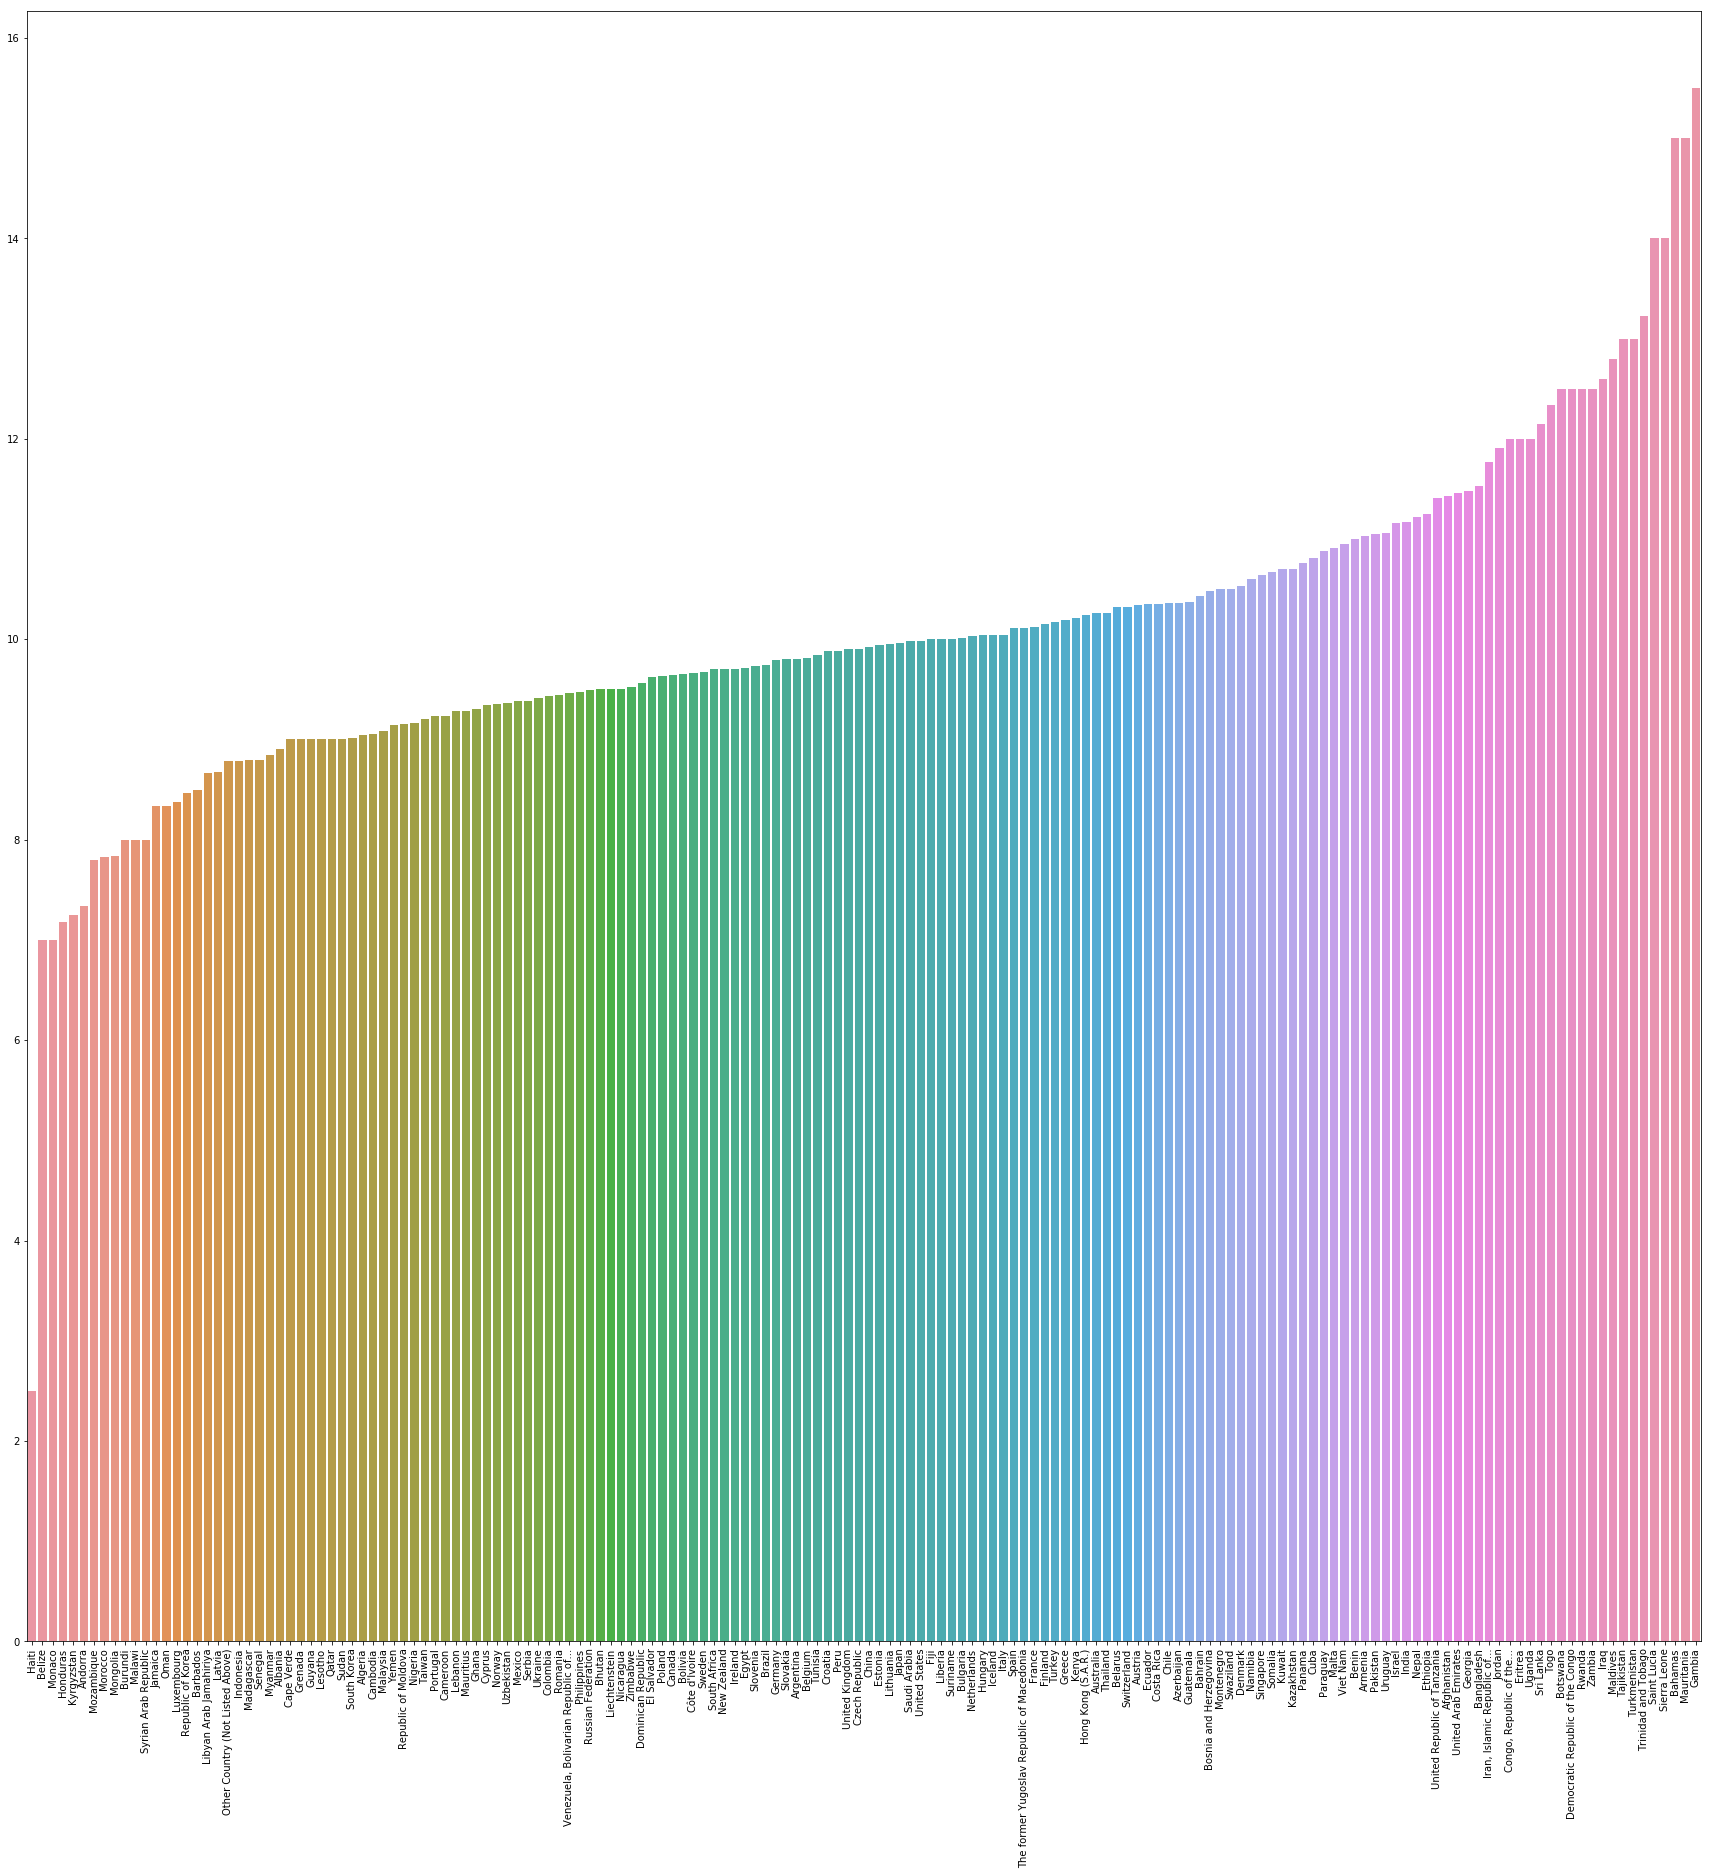

In [150]:
for_plot = df2.groupby(["Country"])["Ease of Participation"].mean().reset_index().dropna()
plt.figure(7 , figsize= (30,30))
#sns.barplot(x = for_plot["Country"] , height = for_plot["Ease of Participation"])
#plt.xticks(rotation = 90)
D = zip(for_plot["Country"], for_plot["Ease of Participation"])
D = sorted( list(D) , key = lambda x : x[1])
plt.figure(1 , figsize = (30,30))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

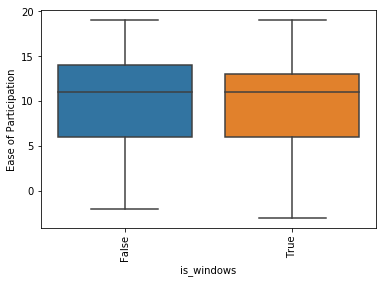

In [51]:
#Windows User Ease
df2["is_windows"] = (df2["OperatingSystem"] == "Windows")
plt.figure(1)
plt.figure(1)
sns.boxplot(x = df2["is_windows"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
plt.show()


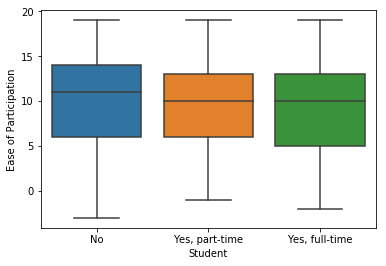

In [52]:
#Student Ease
plt.figure(1)
sns.boxplot(x = df2["Student"] , y = df2["Ease of Participation"])
plt.show()

# Bro please try to rearrange increasing according to Median, awesome conclusion

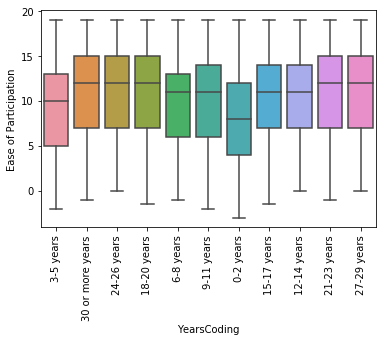

In [55]:
plt.figure(1)
sns.boxplot(x = df2["YearsCoding"] , y = df2["Ease of Participation"])
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

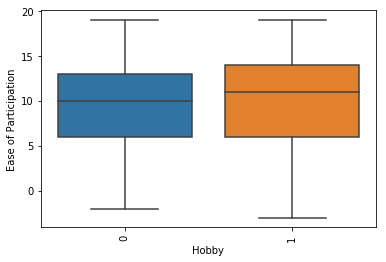

In [56]:
plt.figure(1)
sns.boxplot(x = df2["Hobby"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

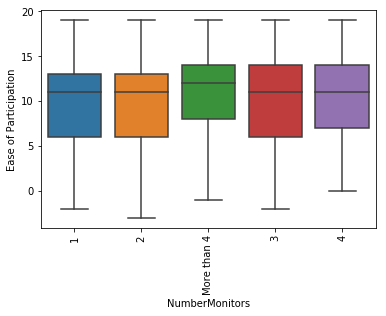

In [57]:
#Number of Monitors??
plt.figure(1)
sns.boxplot(x = df2["NumberMonitors"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

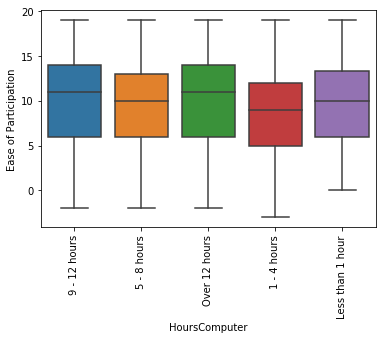

In [68]:
plt.figure(1)
sns.boxplot(x = df2["HoursComputer"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

In [63]:
#Something has to be done with multiple choice

MULTIPLE_CHOICE = [
    'CommunicationTools','EducationTypes','SelfTaughtTypes','HackathonReasons', 
    'DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith',
    'PlatformDesireNextYear','Methodology','VersionControl',
    'AdBlockerReasons','AdsActions','ErgonomicDevices','Gender',
    'SexualOrientation','RaceEthnicity', 'LanguageWorkedWith'
]
for c in MULTIPLE_CHOICE:
    # Check if there are multiple entries in this column
    temp = df2[c].str.split(';', expand=True)

    # Get all the possible values in this column
    new_columns = pd.unique(temp.values.ravel())
    for new_c in new_columns:
        if new_c and new_c is not np.nan:
            
            # Create new column for each unique column
            idx = df2[c].str.contains(new_c, regex=False).fillna(False)
            df2.loc[idx, f"{c}_{new_c}"] = 1

    # Info to the user
    print(f">> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns")

    # Dont Drop the original column
    #hecko.drop(c, axis=1, inplace=True)

>> Multiple entries in CommunicationTools. Added 13 one-hot-encoding columns
>> Multiple entries in EducationTypes. Added 11 one-hot-encoding columns
>> Multiple entries in SelfTaughtTypes. Added 11 one-hot-encoding columns
>> Multiple entries in HackathonReasons. Added 9 one-hot-encoding columns
>> Multiple entries in DatabaseWorkedWith. Added 23 one-hot-encoding columns
>> Multiple entries in DatabaseDesireNextYear. Added 23 one-hot-encoding columns
>> Multiple entries in PlatformWorkedWith. Added 28 one-hot-encoding columns
>> Multiple entries in PlatformDesireNextYear. Added 28 one-hot-encoding columns
>> Multiple entries in Methodology. Added 12 one-hot-encoding columns
>> Multiple entries in VersionControl. Added 9 one-hot-encoding columns
>> Multiple entries in AdBlockerReasons. Added 8 one-hot-encoding columns
>> Multiple entries in AdsActions. Added 6 one-hot-encoding columns
>> Multiple entries in ErgonomicDevices. Added 6 one-hot-encoding columns
>> Multiple entries in Gende

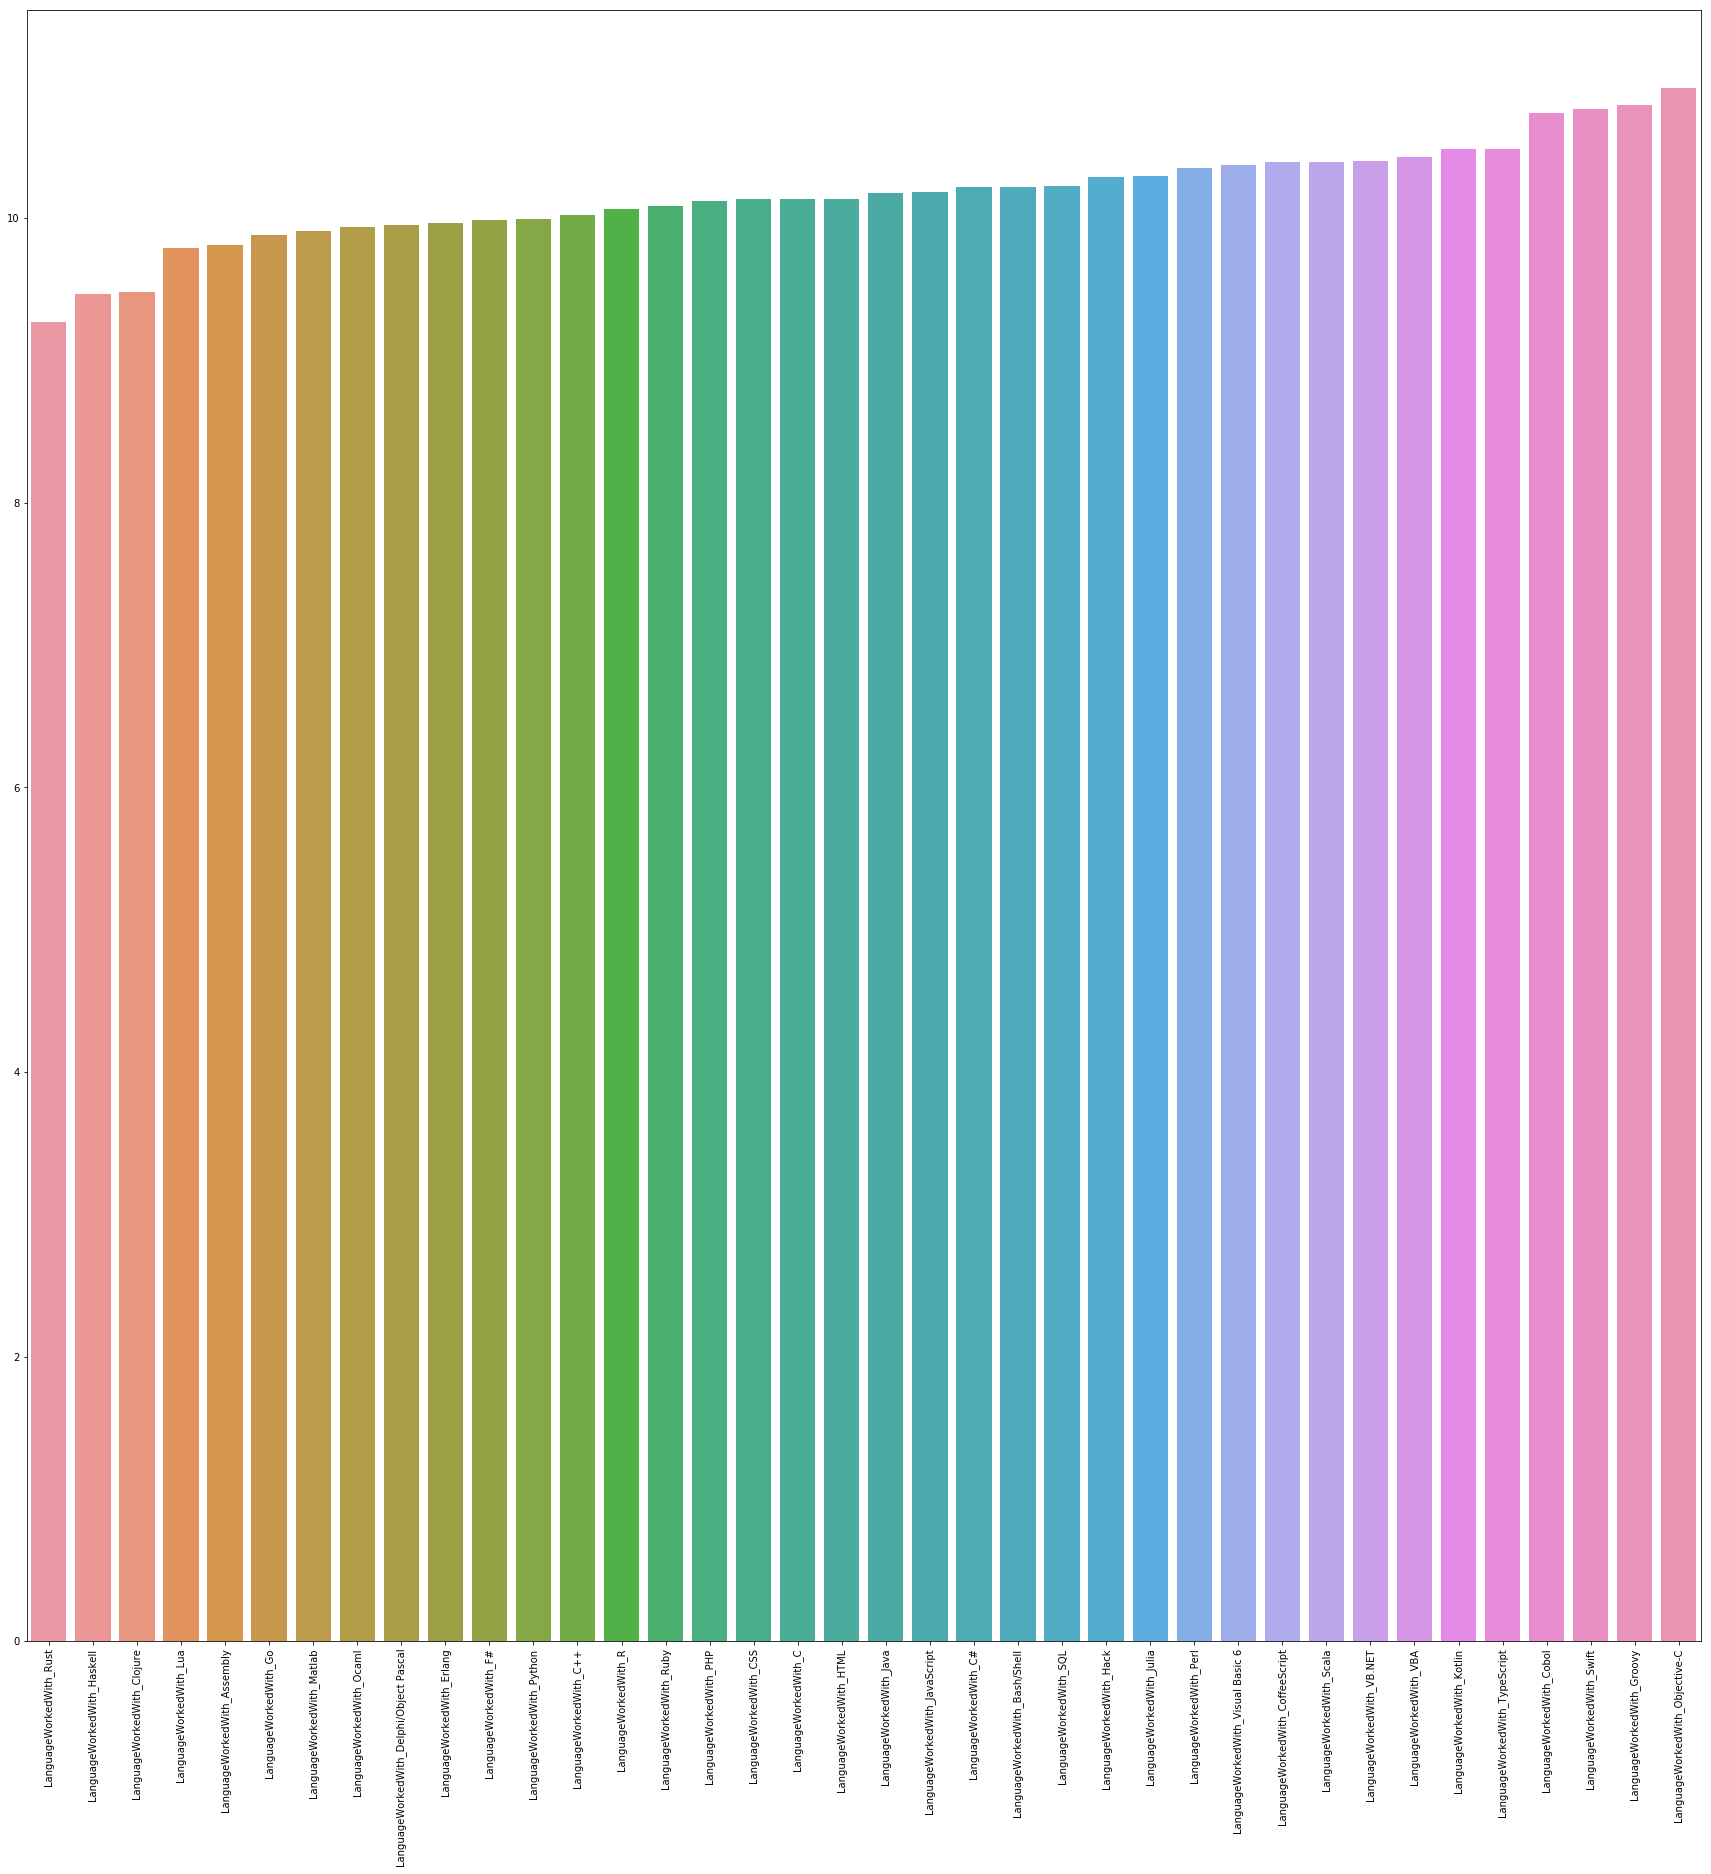

In [125]:
df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]].fillna(0)
for_plot = df2[df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]].sum(axis=1)!=0]
for_plot = for_plot[-pd.isnull(for_plot["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]] #Those who learn using stack overflow, probably the lanugage , therefore subsettin
for_plot = for_plot[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)] + ['Ease of Participation']]
D = {}
for i in for_plot.columns.values[:-1]:
    D[i] = for_plot[for_plot[i] == 1]["Ease of Participation"].mean()
D = sorted(D.items(), key=operator.itemgetter(1))
plt.figure(1 , figsize = (30,30))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

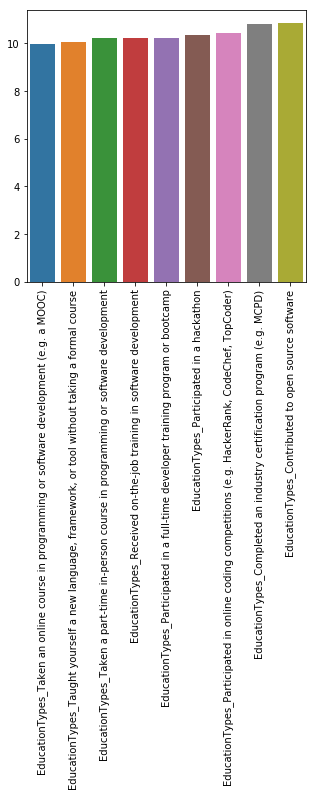

In [141]:
df2[[cols for cols in df2.columns.values if re.search('^EducationTypes_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('^EducationTypes_' , cols)]].fillna(0)    
for_plot = df2[df2[[cols for cols in df2.columns.values if re.search('^EducationTypes_' , cols)]].sum(axis=1)!=0]
#Those who learn using stack overflow, probably the lanugage , therefore subsettin
for_plot = for_plot[[cols for cols in df2.columns.values if re.search('^EducationTypes_' , cols)] + ['Ease of Participation']]
D = {}
for i in for_plot.columns.values[:-1]:
    D[i] = for_plot[for_plot[i] == 1]["Ease of Participation"].mean()
D = sorted(D.items(), key=operator.itemgetter(1))
plt.figure(1 , figsize = (5,5))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

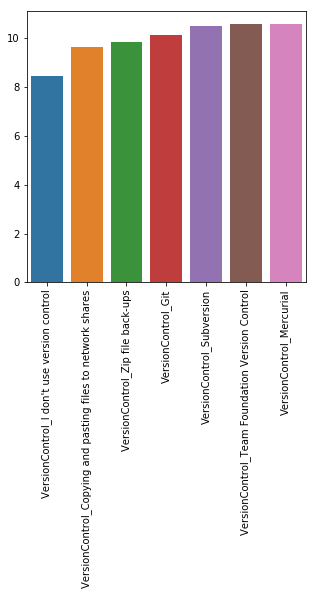

In [169]:
df2[[cols for cols in df2.columns.values if re.search('^VersionControl_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('^VersionControl_' , cols)]].fillna(0)
for_plot = df2[df2[[cols for cols in df2.columns.values if re.search('^VersionControl_' , cols)]].sum(axis=1)!=0]
#Those who learn using stack overflow, probably the lanugage , therefore subsettin
for_plot = for_plot[[cols for cols in df2.columns.values if re.search('^VersionControl_' , cols)] + ['Ease of Participation']]
D = {}
for i in for_plot.columns.values[:-1]:
    D[i] = for_plot[for_plot[i] == 1]["Ease of Participation"].mean()
D = sorted(D.items(), key=operator.itemgetter(1))
plt.figure(1 , figsize = (5,5))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

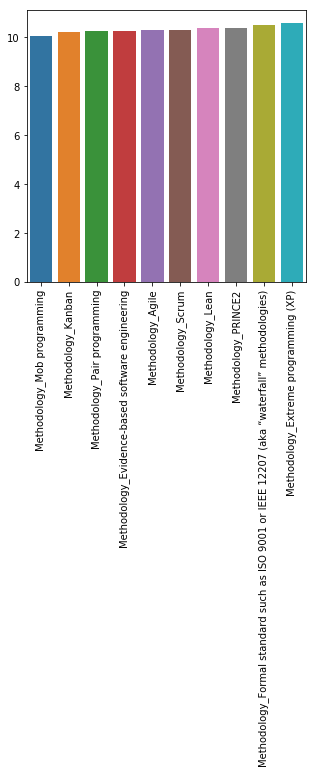

In [170]:
df2[[cols for cols in df2.columns.values if re.search('^Methodology_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('^Methodology_' , cols)]].fillna(0)
for_plot = df2[df2[[cols for cols in df2.columns.values if re.search('^Methodology_' , cols)]].sum(axis=1)!=0]
#Those who learn using stack overflow, probably the lanugage , therefore subsettin
for_plot = for_plot[[cols for cols in df2.columns.values if re.search('^Methodology_' , cols)] + ['Ease of Participation']]
D = {}
for i in for_plot.columns.values[:-1]:
    D[i] = for_plot[for_plot[i] == 1]["Ease of Participation"].mean()
D = sorted(D.items(), key=operator.itemgetter(1))
plt.figure(1 , figsize = (5,5))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

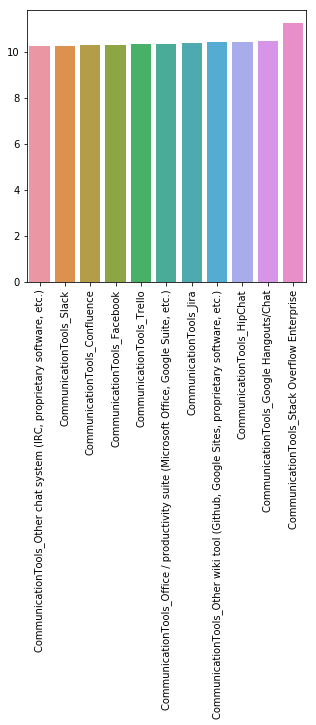

In [171]:
df2[[cols for cols in df2.columns.values if re.search('CommunicationTools_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('CommunicationTools_' , cols)]].fillna(0)
for_plot = df2[df2[[cols for cols in df2.columns.values if re.search('CommunicationTools_' , cols)]].sum(axis=1)!=0]
#Those who learn using stack overflow, probably the lanugage , therefore subsettin
for_plot = for_plot[[cols for cols in df2.columns.values if re.search('CommunicationTools_' , cols)] + ['Ease of Participation']]
D = {}
for i in for_plot.columns.values[:-1]:
    D[i] = for_plot[for_plot[i] == 1]["Ease of Participation"].mean()
D = sorted(D.items(), key=operator.itemgetter(1))
plt.figure(1 , figsize = (5,5))
x_val = [x[0] for x in D]
y_val = [x[1] for x in D]
sns.barplot(x_val , y_val)
plt.xticks(rotation = 90)
plt.show()

In [176]:
#Excluding columns with more than what? categories
df2.shape

(98855, 348)

In [183]:
pd.unique(df2["Hobby"])

array([1, 0])

In [256]:
uniqueness = []

In [257]:
for i in df2.columns.values[1:]:
    if len(pd.unique(df2[i])) > 15:
        print(i)
    elif "StackOverflow" in i:
        print("TARGET --->", i)
    elif "Hypo" in i:
        print("TARGET --->", i) 
    else:
        uniqueness.append(i)

Country
DevType
Currency
Salary
ConvertedSalary
CurrencySymbol
CommunicationTools
EducationTypes
SelfTaughtTypes
HackathonReasons
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
FrameworkWorkedWith
FrameworkDesireNextYear
IDE
Methodology
VersionControl
AdBlockerReasons
AdsActions
TARGET ---> StackOverflowRecommend
TARGET ---> StackOverflowVisit
TARGET ---> StackOverflowHasAccount
TARGET ---> StackOverflowParticipate
TARGET ---> StackOverflowJobs
TARGET ---> StackOverflowDevStory
TARGET ---> StackOverflowJobsRecommend
TARGET ---> StackOverflowConsiderMember
TARGET ---> HypotheticalTools1
TARGET ---> HypotheticalTools2
TARGET ---> HypotheticalTools3
TARGET ---> HypotheticalTools4
TARGET ---> HypotheticalTools5
ErgonomicDevices
Gender
RaceEthnicity
Ease of Participation
log_scale_participation_score


In [255]:
uniqueness

['Hobby',
 'OpenSource',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'SalaryType',
 'TimeFullyProductive',
 'TimeAfterBootcamp',
 'AgreeDisagree1

In [313]:
for_tree = df2
for_tree = for_tree[[cols for cols in uniqueness]]
for_tree = for_tree.drop("SexualOrientation", axis = 1)
listo = list(for_tree.dtypes == object)
for_tree2 = for_tree
for i,col in enumerate(for_tree.columns.values):
    if listo[i] == True:
        new_columns = pd.get_dummies(for_tree[col])
        for new_c in new_columns:
            print(f"{col}_{new_c}")
            if new_c and new_c is not np.nan:
                for_tree2 = pd.concat([for_tree2, new_columns[new_c]] , axis = 1)
                for_tree2.columns.values[-1] = f"{col}_{new_c}"
        for_tree2 = for_tree2.drop(col,axis = 1)

OpenSource_No
OpenSource_Yes
Student_No
Student_Yes, full-time
Student_Yes, part-time
Employment_Employed full-time
Employment_Employed part-time
Employment_Independent contractor, freelancer, or self-employed
Employment_Not employed, and not looking for work
Employment_Not employed, but looking for work
Employment_Retired
FormalEducation_Associate degree
FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)
FormalEducation_I never completed any formal education
FormalEducation_Master’s degree (MA, MS, M.Eng., MBA, etc.)
FormalEducation_Other doctoral degree (Ph.D, Ed.D., etc.)
FormalEducation_Primary/elementary school
FormalEducation_Professional degree (JD, MD, etc.)
FormalEducation_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
FormalEducation_Some college/university study without earning a degree
UndergradMajor_A business discipline (ex. accounting, finance, marketing)
UndergradMajor_A health science (ex. nursing, pharmacy, radiology)
Undergra

WakeTime_I work night shifts
HoursComputer_1 - 4 hours
HoursComputer_5 - 8 hours
HoursComputer_9 - 12 hours
HoursComputer_Less than 1 hour
HoursComputer_Over 12 hours
HoursOutside_1 - 2 hours
HoursOutside_3 - 4 hours
HoursOutside_30 - 59 minutes
HoursOutside_Less than 30 minutes
HoursOutside_Over 4 hours
SkipMeals_1 - 2 times per week
SkipMeals_3 - 4 times per week
SkipMeals_Daily or almost every day
SkipMeals_Never
Exercise_1 - 2 times per week
Exercise_3 - 4 times per week
Exercise_Daily or almost every day
Exercise_I don't typically exercise
EducationParents_Associate degree
EducationParents_Bachelor’s degree (BA, BS, B.Eng., etc.)
EducationParents_Master’s degree (MA, MS, M.Eng., MBA, etc.)
EducationParents_Other doctoral degree (Ph.D, Ed.D., etc.)
EducationParents_Primary/elementary school
EducationParents_Professional degree (JD, MD, etc.)
EducationParents_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
EducationParents_Some college/university s

In [314]:
for_tree2.head()

Hobby  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
0      1        10.0         7.0         8.0         1.0         2.0   
1      1         1.0         7.0        10.0         8.0         2.0   
2      1         NaN         NaN         NaN         NaN         NaN   
3      0         NaN         NaN         NaN         NaN         NaN   
4      1         8.0         5.0         7.0         1.0         2.0   

   AssessJob6  AssessJob7  AssessJob8  AssessJob9          ...            \
0         5.0         3.0         4.0         9.0          ...             
1         5.0         4.0         3.0         6.0          ...             
2         NaN         NaN         NaN         NaN          ...             
3         NaN         NaN         NaN         NaN          ...             
4         6.0         4.0         3.0        10.0          ...             

   MilitaryUS_Yes  SurveyTooLong_The survey was an appropriate length  \
0               0                                                  1    
1               0                                                  1    
2               0                                                  0    
3               0                                                  1    
4               0                                                  1    

   SurveyTooLong_The survey was too long  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   SurveyTooLong_The survey was too short  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   SurveyEasy_Neither easy nor difficult  SurveyEasy_Somewhat difficult  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   SurveyEasy_Somewhat easy  SurveyEasy_Very difficult  SurveyEasy_Very easy  \
0                         0                          0                     1   
1                         1                          0                     0   
2                         0                          0                     0   
3                         1                          0                     0   
4                         1                          0                     0   

   is_stack_learner_True  
0                      1  
1                      1  
2                      0  
3                      1  
4                      1  

[5 rows x 510 columns]

In [318]:
--NotebookApp.iopub_data_rate_limit = 10000000000

SyntaxError: can't assign to operator (<ipython-input-318-864194f1e787>, line 1)

In [317]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(for_tree2 , label= df2["Ease of Participation"])
dtest = xgb.DMatrix(df2["Ease of Participation"])
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'reg:linear' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [280]:
for_treex = for_tree
for_treex = pd.concat([for_treex , pd.get_dummies(for_treex['OpenSource'])["No"]] , axis = 1 , names = [None , "sex"])

In [304]:
for_tree2.head()

Hobby  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
0      1        10.0         7.0         8.0         1.0         2.0   
1      1         1.0         7.0        10.0         8.0         2.0   
2      1         NaN         NaN         NaN         NaN         NaN   
3      0         NaN         NaN         NaN         NaN         NaN   
4      1         8.0         5.0         7.0         1.0         2.0   

   AssessJob6  AssessJob7  AssessJob8  AssessJob9           ...             \
0         5.0         3.0         4.0         9.0           ...              
1         5.0         4.0         3.0         6.0           ...              
2         NaN         NaN         NaN         NaN           ...              
3         NaN         NaN         NaN         NaN           ...              
4         6.0         4.0         3.0        10.0           ...              

   LanguageWorkedWith_Yes  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   

   LanguageWorkedWith_The survey was an appropriate length  \
0                                                  1         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  1         

   LanguageWorkedWith_The survey was too long  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   LanguageWorkedWith_The survey was too short  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LanguageWorkedWith_Neither easy nor difficult  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LanguageWorkedWith_Somewhat difficult  LanguageWorkedWith_Somewhat easy  \
0                                      0                                 0   
1                                      0                                 1   
2                                      0                                 0   
3                                      0                                 1   
4                                      0                                 1   

   LanguageWorkedWith_Very difficult  LanguageWorkedWith_Very easy  \
0                                  0                             1   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   LanguageWorkedWith_True  
0                        1  
1                        1  
2                        0  
3                        1  
4                        1  

[5 rows x 510 columns]

In [301]:
for_tree2.head()

Hobby  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
0      1        10.0         7.0         8.0         1.0         2.0   
1      1         1.0         7.0        10.0         8.0         2.0   
2      1         NaN         NaN         NaN         NaN         NaN   
3      0         NaN         NaN         NaN         NaN         NaN   
4      1         8.0         5.0         7.0         1.0         2.0   

   AssessJob6  AssessJob7  AssessJob8  AssessJob9           ...             \
0         5.0         3.0         4.0         9.0           ...              
1         5.0         4.0         3.0         6.0           ...              
2         NaN         NaN         NaN         NaN           ...              
3         NaN         NaN         NaN         NaN           ...              
4         6.0         4.0         3.0        10.0           ...              

   LanguageWorkedWith_Yes  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   

   LanguageWorkedWith_The survey was an appropriate length  \
0                                                  1         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  1         

   LanguageWorkedWith_The survey was too long  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   LanguageWorkedWith_The survey was too short  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LanguageWorkedWith_Neither easy nor difficult  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LanguageWorkedWith_Somewhat difficult  LanguageWorkedWith_Somewhat easy  \
0                                      0                                 0   
1                                      0                                 1   
2                                      0                                 0   
3                                      0                                 1   
4                                      0                                 1   

   LanguageWorkedWith_Very difficult  LanguageWorkedWith_Very easy  \
0                                  0                             1   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   LanguageWorkedWith_True  
0                        1  
1                        1  
2                        0  
3                        1  
4                        1  

[5 rows x 510 columns]

In [287]:
df1 = pd.DataFrame([['a', 1 , 2], ['b', 2 , 3]],
             columns=[None, None,'number'])

In [291]:
for_treex.iloc[:,:-1]

Hobby OpenSource         Student  \
0          1         No              No   
1          1        Yes              No   
2          1        Yes              No   
3          0         No              No   
4          1         No  Yes, part-time   
5          1         No              No   
6          1        Yes              No   
7          1        Yes              No   
8          1        Yes              No   
9          0        Yes              No   
10         1         No              No   
11         1        Yes              No   
12         1         No             NaN   
13         0         No              No   
14         0         No  Yes, full-time   
15         1         No              No   
16         0         No  Yes, full-time   
17         1         No              No   
18         1        Yes  Yes, full-time   
19         1        Yes  Yes, full-time   
20         1        Yes              No   
21         1         No              No   
22         0         No              No   
23         1         No              No   
24         1         No              No   
25         1        Yes  Yes, full-time   
26         1        Yes              No   
27         0         No              No   
28         1        Yes              No   
29         1        Yes              No   
...      ...        ...             ...   
98825      1         No              No   
98826      1        Yes              No   
98827      1         No             NaN   
98828      0         No             NaN   
98829      1        Yes  Yes, full-time   
98830      1        Yes             NaN   
98831      1         No             NaN   
98832      1        Yes              No   
98833      1         No  Yes, full-time   
98834      1        Yes             NaN   
98835      1        Yes  Yes, full-time   
98836      1        Yes  Yes, full-time   
98837      1         No  Yes, full-time   
98838      0         No              No   
98839      1        Yes              No   
98840      1        Yes  Yes, part-time   
98841      0         No             NaN   
98842      1        Yes              No   
98843      1         No             NaN   
98844      1        Yes             NaN   
98845      0        Yes  Yes, full-time   
98846      1        Yes             NaN   
98847      0         No             NaN   
98848      1         No  Yes, full-time   
98849      0        Yes              No   
98850      1        Yes             NaN   
98851      0        Yes  Yes, full-time   
98852      1        Yes  Yes, full-time   
98853      1         No              No   
98854      1        Yes             NaN   

                                              Employment  \
0                                     Employed part-time   
1                                     Employed full-time   
2                                     Employed full-time   
3                                     Employed full-time   
4                                     Employed full-time   
5                                     Employed full-time   
6                                     Employed full-time   
7                                     Employed full-time   
8                                     Employed full-time   
9                                     Employed full-time   
10                                    Employed full-time   
11                                    Employed full-time   
12                                    Employed full-time   
13                                    Employed full-time   
14                                    Employed full-time   
15                                    Employed full-time   
16                                    Employed part-time   
17                                    Employed full-time   
18                                    Employed full-time   
19                                    Employed part-time   
20                                    Employed full-time   
21                  